In [ ]:
from imageio import imread
from PIL import Image
import imageio

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np

from PIL import Image, ImageEnhance
%matplotlib inline

import cv2 # for openCV


In [ ]:
from google.colab import userdata
import os
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
!kaggle datasets download -d fmena14/crowd-counting

crowd-counting.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip "/content/crowd-counting.zip"

Archive:  /content/crowd-counting.zip
replace frames/frames/seq_000001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: frames/frames/seq_000001.jpg  
  inflating: frames/frames/seq_000002.jpg  
  inflating: frames/frames/seq_000003.jpg  
  inflating: frames/frames/seq_000004.jpg  
  inflating: frames/frames/seq_000005.jpg  
  inflating: frames/frames/seq_000006.jpg  
  inflating: frames/frames/seq_000007.jpg  
  inflating: frames/frames/seq_000008.jpg  
  inflating: frames/frames/seq_000009.jpg  
  inflating: frames/frames/seq_000010.jpg  
  inflating: frames/frames/seq_000011.jpg  
  inflating: frames/frames/seq_000012.jpg  
  inflating: frames/frames/seq_000013.jpg  
  inflating: frames/frames/seq_000014.jpg  
  inflating: frames/frames/seq_000015.jpg  
  inflating: frames/frames/seq_000016.jpg  
  inflating: frames/frames/seq_000017.jpg  
  inflating: frames/frames/seq_000018.jpg  
  inflating: frames/frames/seq_000019.jpg  
  inflating: frames/frames/seq_000020.jpg  
  in

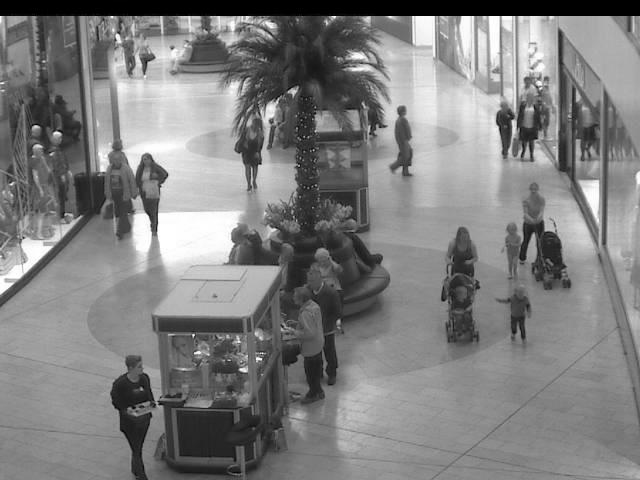

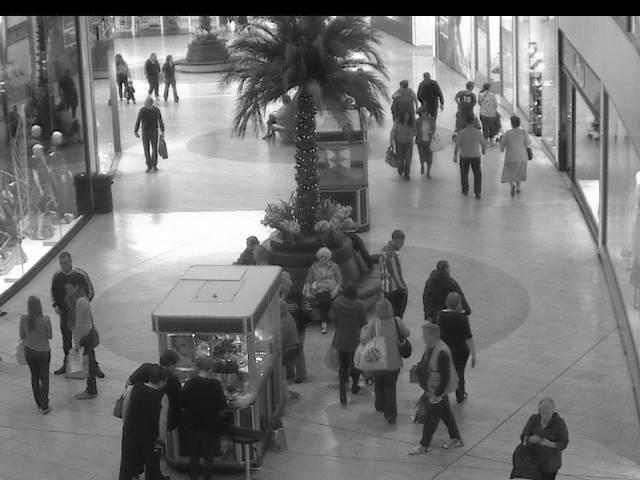

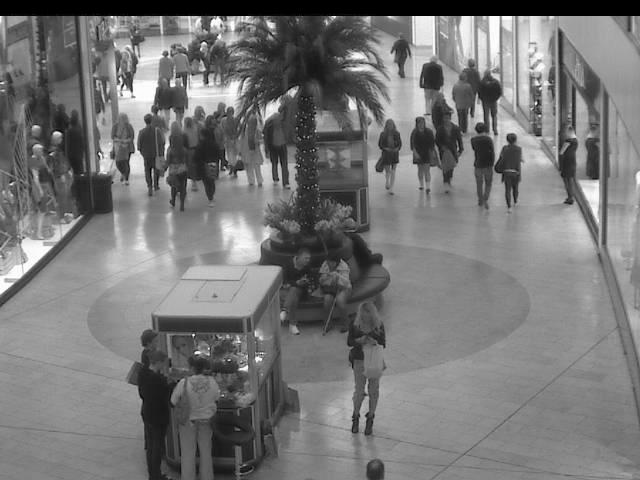

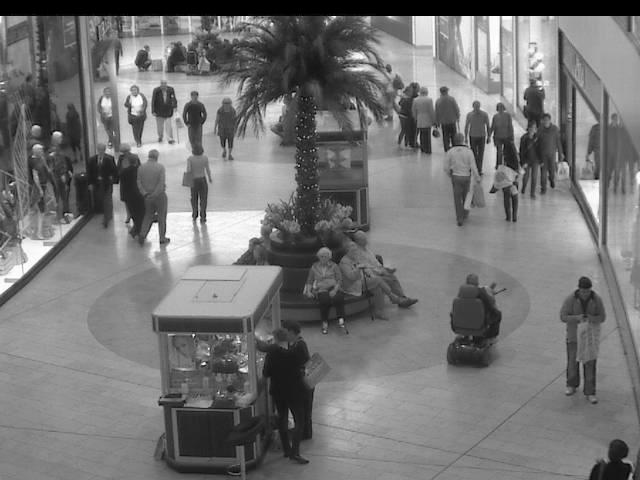

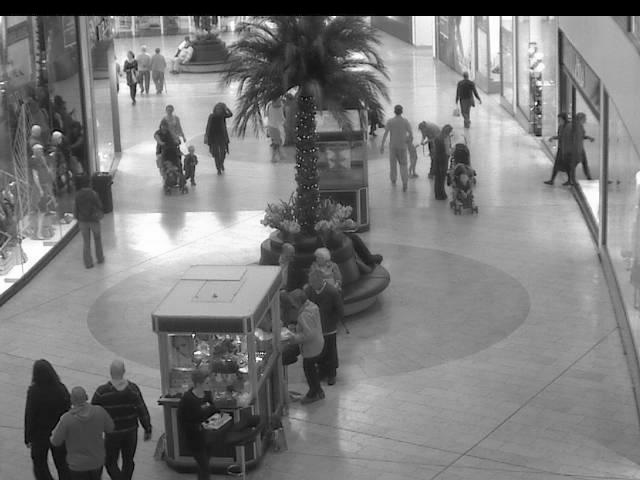

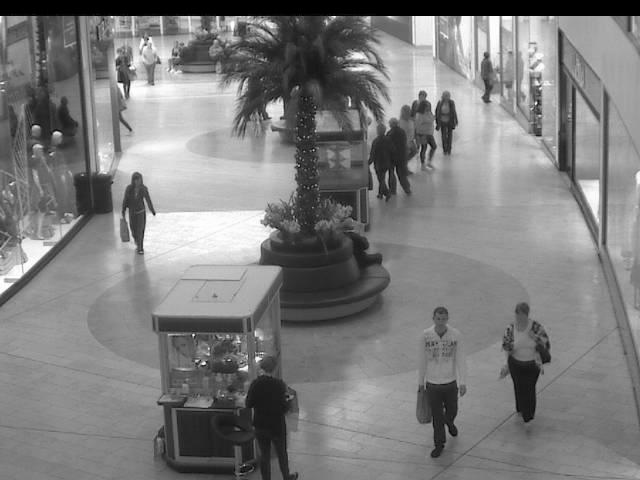

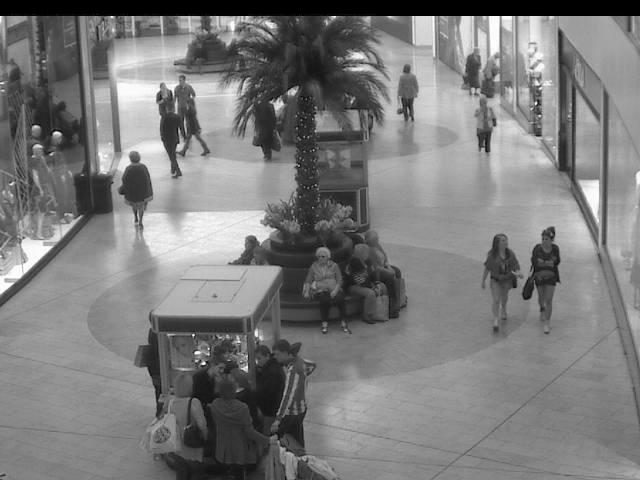

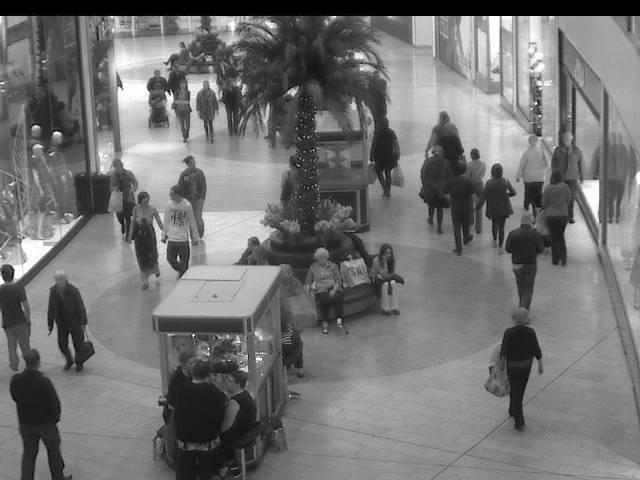

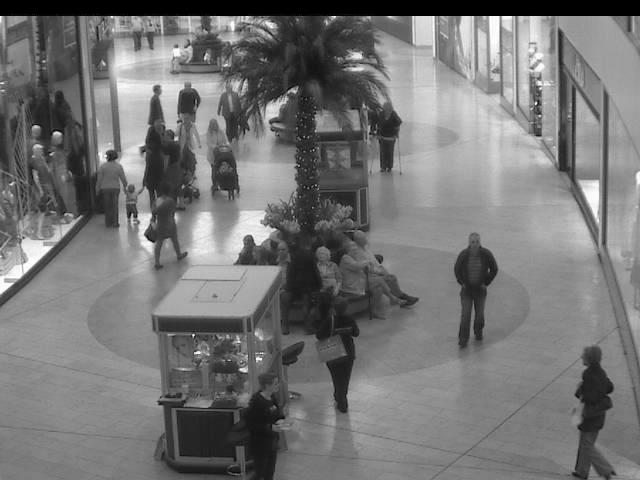

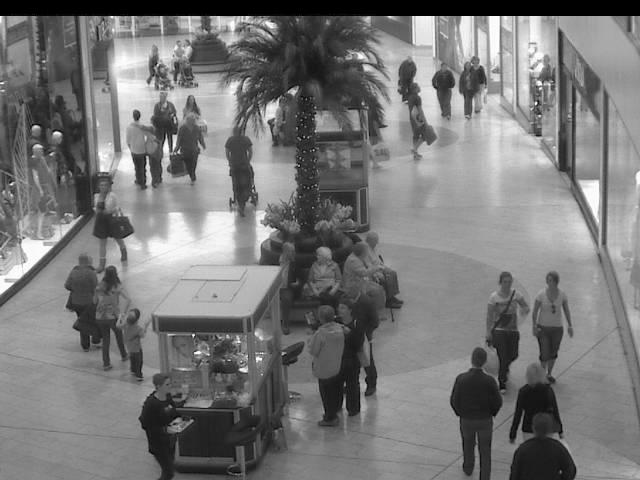

In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow

# Path to the directory containing the images
image_dir = '/content/frames/frames/'

# List all files in the directory
image_files = os.listdir(image_dir)

# Initialize an empty list to store the images
images = []

# Counter to track the number of images converted and displayed
num_images_displayed = 0

# Loop through each image file
for filename in image_files:
    # Check if the file is an image file (assuming all files in the directory are images)
    if filename.endswith('.jpg'):
        # Read the image
        image_path = os.path.join(image_dir, filename)
        # Convert the image to grayscale
        image = cv2.imread(image_path)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Append the grayscale image to the list
        images.append(gray_image)
        # Display the grayscale image
        cv2_imshow(gray_image)
        # Increment the counter
        num_images_displayed += 1
        # Break the loop if 10 images have been displayed
        if num_images_displayed == 10:
            break

# Close all OpenCV windows
cv2.destroyAllWindows()


Cropped Image 1-A size (height, width): (280, 220, 3)
Cropped Image 1-B size (height, width): (200, 200, 3)
Cropped Image 1-C size (height, width): (280, 300, 3)
Cropped Image 2-A size (height, width): (280, 220, 3)
Cropped Image 2-B size (height, width): (200, 200, 3)
Cropped Image 2-C size (height, width): (280, 300, 3)
Cropped Image 3-A size (height, width): (280, 220, 3)
Cropped Image 3-B size (height, width): (200, 200, 3)
Cropped Image 3-C size (height, width): (280, 300, 3)


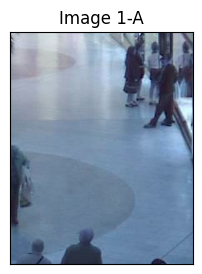

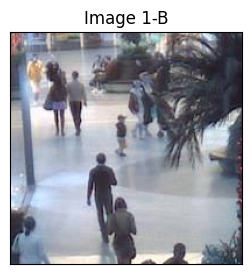

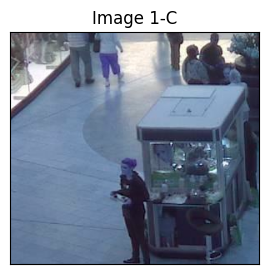

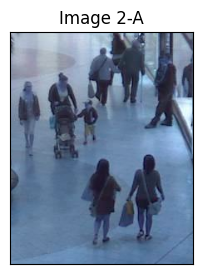

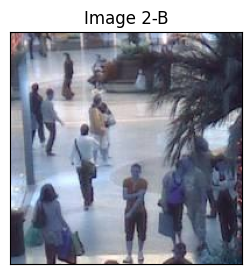

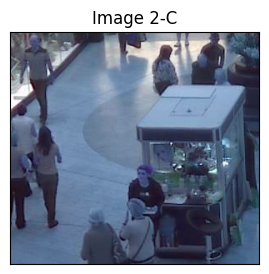

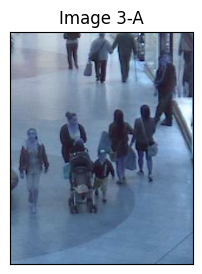

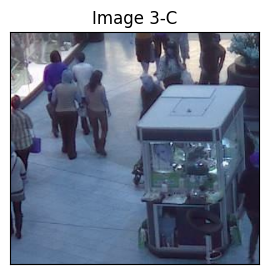

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def crop(image, start_y, end_y, start_x, end_x):
    # Function to crop the image
    img_cropped = image[start_y:end_y, start_x:end_x]
    return img_cropped


def plotting(image_set, titles, rows, cols, figsize):
    # Function to plot the images
    for i in range(len(image_set)):
        plt.figure(figsize=(figsize, figsize))
        plt.subplot(rows, cols, i+1)
        plt.imshow(image_set[i], 'gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])

# Example dataset
# Replace this with your actual dataset
# Assuming 'images' is a list of images
image_paths = [
    '/content/frames/frames/seq_000001.jpg',
    '/content/frames/frames/seq_000002.jpg',
    '/content/frames/frames/seq_000003.jpg'
]

images = [cv2.imread(img) for img in image_paths]

cropped_images = []
titles = []

# Crop and resize images
for idx, img in enumerate(images, 1):
    cropped_a = crop(img, 100, 380, 380, 600)
    cropped_b = crop(img, 20, 220, 100, 300)
    cropped_c = crop(img, 200, 500, 0, 300)

    cropped_images.extend([cropped_a, cropped_b, cropped_c])
    titles.extend([f"Image {idx}-A", f"Image {idx}-B", f"Image {idx}-C"])

# Plotting images
plotting(cropped_images, titles, len(images) * 3, 3, 32)

# Print the size of each image
for idx, img in enumerate(images, 1):
    print(f"Cropped Image {idx}-A size (height, width):", crop(img, 100, 380, 380, 600).shape)
    print(f"Cropped Image {idx}-B size (height, width):", crop(img, 20, 220, 100, 300).shape)
    print(f"Cropped Image {idx}-C size (height, width):", crop(img, 200, 500, 0, 300).shape)


Resized Image 1-A size (height, width): (560, 440, 3)
Resized Image 1-B size (height, width): (400, 400, 3)
Resized Image 1-C size (height, width): (560, 600, 3)
Resized Image 2-A size (height, width): (560, 440, 3)
Resized Image 2-B size (height, width): (400, 400, 3)
Resized Image 2-C size (height, width): (560, 600, 3)
Resized Image 3-A size (height, width): (560, 440, 3)
Resized Image 3-B size (height, width): (400, 400, 3)
Resized Image 3-C size (height, width): (560, 600, 3)


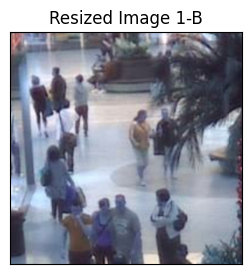

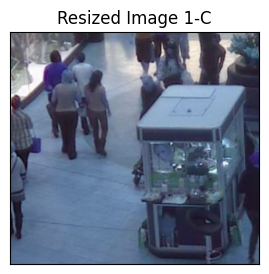

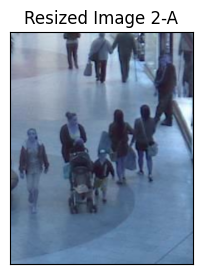

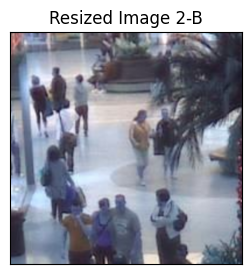

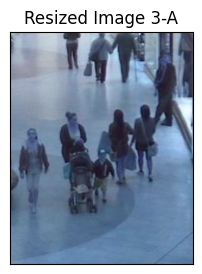

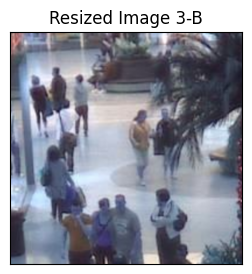

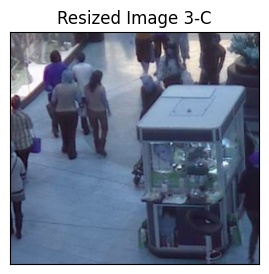

In [ ]:
image_paths = [
    '/content/frames/frames/seq_000001.jpg',
    '/content/frames/frames/seq_000002.jpg',
    '/content/frames/frames/seq_000003.jpg'
]
def resize(image, width, height):
    # Function to resize the image
    img_resized = cv2.resize(image, (width, height))
    return img_resized

images = [cv2.imread(img) for img in image_paths]

multiplier = 2

resized_images = []
titles = []

# Crop and resize images
for idx, img in enumerate(images, 1):
    resized_a = resize(cropped_a, cropped_a.shape[1] * multiplier, cropped_a.shape[0] * multiplier)
    resized_b = resize(cropped_b, cropped_b.shape[1] * multiplier, cropped_b.shape[0] * multiplier)
    resized_c = resize(cropped_c, cropped_c.shape[1] * multiplier, cropped_c.shape[0] * multiplier)

    resized_images.extend([resized_a, resized_b, resized_c])
    titles.extend([f"Resized Image {idx}-A", f"Resized Image {idx}-B", f"Resized Image {idx}-C"])

# Plotting images
plotting(resized_images, titles, len(images) * 3, 3, 32)

# Print the size of each image
for idx, img in enumerate(images, 1):
    print(f"Resized Image {idx}-A size (height, width):", resized_a.shape)
    print(f"Resized Image {idx}-B size (height, width):", resized_b.shape)
    print(f"Resized Image {idx}-C size (height, width):", resized_c.shape)


<ipython-input-6-10f21c289b11>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(figsize, figsize))


Thresholding Image 10-A size (height, width): (560, 440, 3)
Thresholding Image 10-B size (height, width): (400, 400, 3)
Thresholding Image 10-C size (height, width): (560, 600, 3)


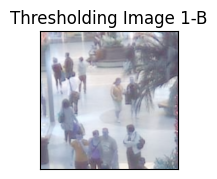

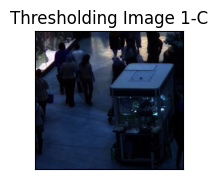

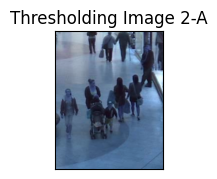

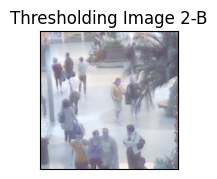

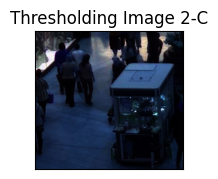

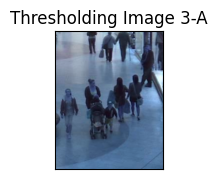

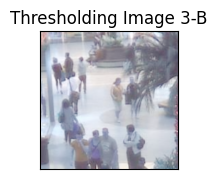

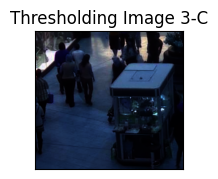

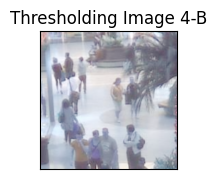

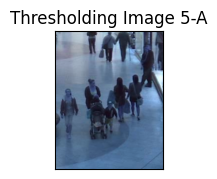

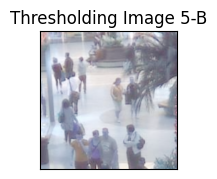

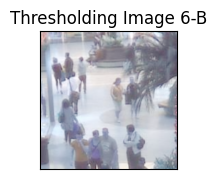

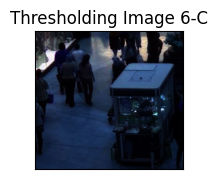

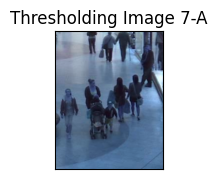

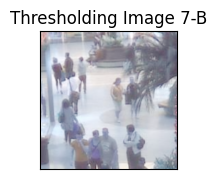

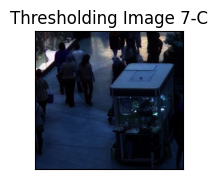

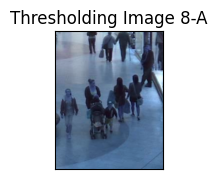

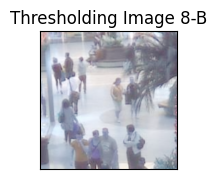

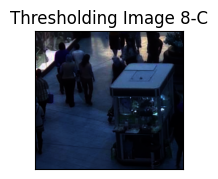

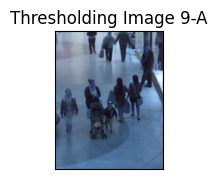

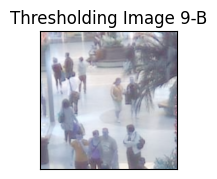

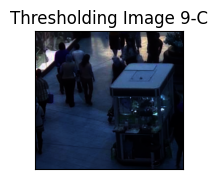

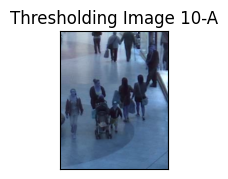

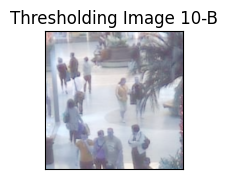

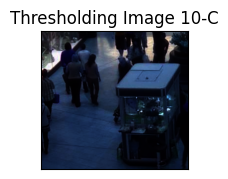

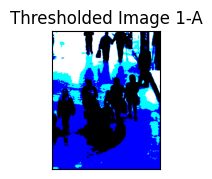

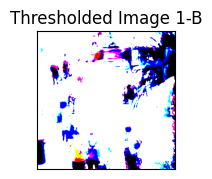

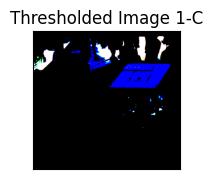

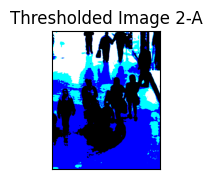

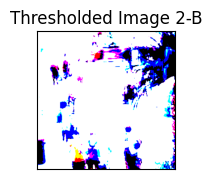

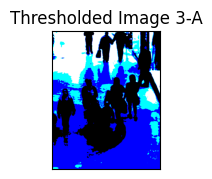

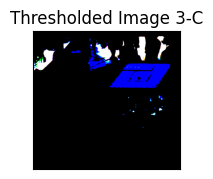

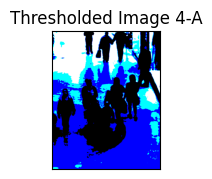

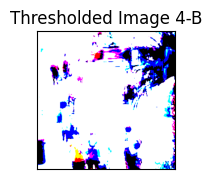

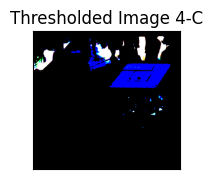

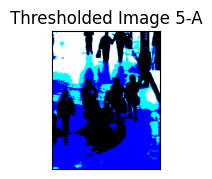

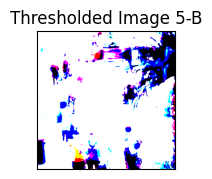

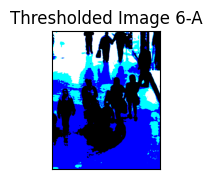

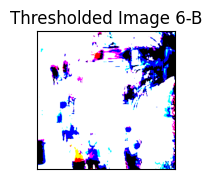

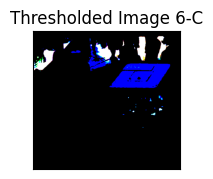

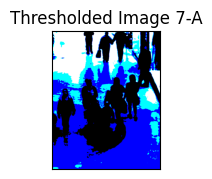

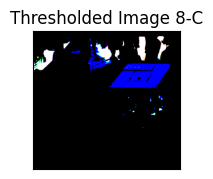

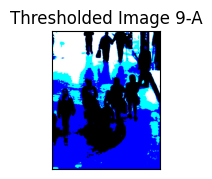

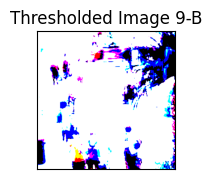

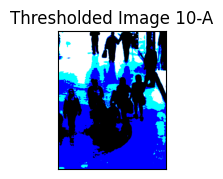

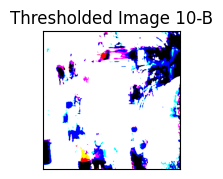

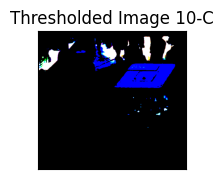

In [ ]:
def gamma_correction(image, gamma):
    # Apply gamma correction
    gamma_corrected = np.array(255 * (image / 255) ** gamma, dtype = 'uint8')
    return gamma_corrected
def threshold(image):
    # Apply thresholding
    _, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    return thresh

image_paths = [
    '/content/frames/frames/seq_000001.jpg',
    '/content/frames/frames/seq_000002.jpg',
    '/content/frames/frames/seq_000003.jpg',
    '/content/frames/frames/seq_000004.jpg',
    '/content/frames/frames/seq_000005.jpg',
    '/content/frames/frames/seq_000006.jpg',
    '/content/frames/frames/seq_000007.jpg',
    '/content/frames/frames/seq_000008.jpg',
    '/content/frames/frames/seq_000009.jpg',
    '/content/frames/frames/seq_000010.jpg'
]

images = [cv2.imread(img) for img in image_paths]

multiplier = 2
gamma_value_a = 1.2
gamma_value_b = 0.5
gamma_value_c = 2.5
gamma_corrected_images = []
titles = []

thresholded_images = []
titles_thresholded = []
for idx, img in enumerate(images, 1):
    gamma_a = gamma_correction(resized_a, gamma_value_a)
    gamma_b = gamma_correction(resized_b, gamma_value_b)
    gamma_c = gamma_correction(resized_c, gamma_value_c)

    gamma_corrected_images.extend([gamma_a, gamma_b, gamma_c])
    titles.extend([f"Thresholding Image {idx}-A", f"Thresholding Image {idx}-B", f"Thresholding Image {idx}-C"])

    threshold_a = threshold(gamma_a)
    threshold_b = threshold(gamma_b)
    threshold_c = threshold(gamma_c)

    thresholded_images.extend([threshold_a, threshold_b, threshold_c])
    titles_thresholded.extend([f"Thresholded Image {idx}-A", f"Thresholded Image {idx}-B", f"Thresholded Image {idx}-C"])

plotting(gamma_corrected_images, titles, len(images) * 3, 3, 64)
plotting(thresholded_images, titles_thresholded, len(images) * 3, 3, 64)

print(f"Thresholding Image {idx}-A size (height, width):", gamma_a.shape)
print(f"Thresholding Image {idx}-B size (height, width):", gamma_b.shape)
print(f"Thresholding Image {idx}-C size (height, width):", gamma_c.shape)

In [ ]:
def dilation_erosion(image):
    # Apply dilation and erosion
    kernel = np.ones((5,5), np.uint8)
    dilated = cv2.dilate(image, kernel, iterations=1)
    eroded = cv2.erode(dilated, kernel, iterations=1)
    return eroded

In [ ]:
dilated_eroded_images = []
titles_dilated_eroded = []

In [ ]:
for idx, img in enumerate(images, 1):
    dilated_eroded_a = dilation_erosion(threshold_a)
    dilated_eroded_b = dilation_erosion(threshold_b)
    dilated_eroded_c = dilation_erosion(threshold_c)

    dilated_eroded_images.extend([dilated_eroded_a, dilated_eroded_b, dilated_eroded_c])
    titles_dilated_eroded.extend([f"Dilation and Erosion Image {idx}-A", f"Dilation and Erosion Image {idx}-B", f"Dilation and Erosion Image {idx}-C"])

<ipython-input-6-10f21c289b11>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(figsize, figsize))


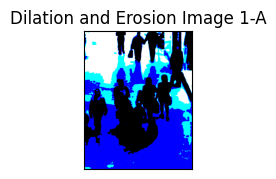

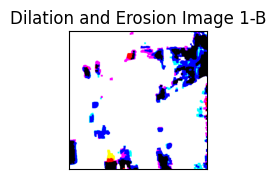

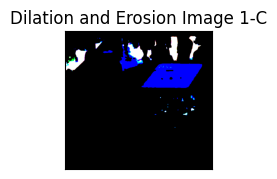

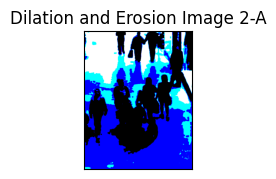

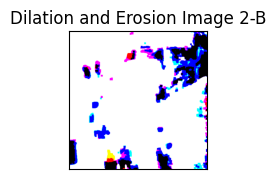

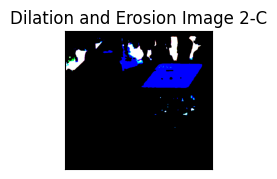

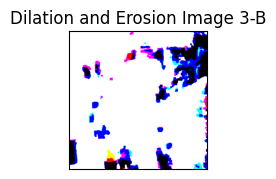

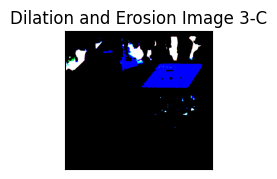

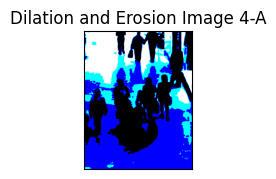

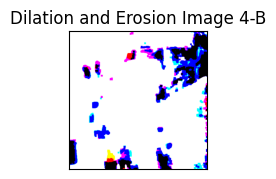

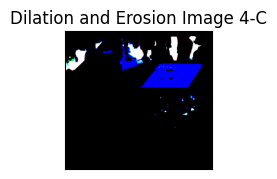

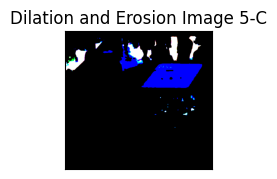

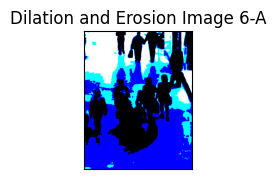

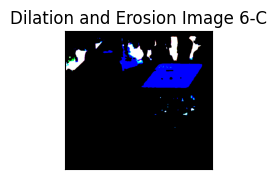

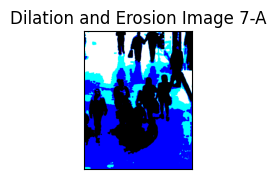

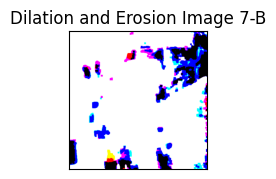

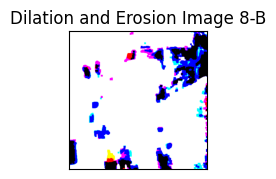

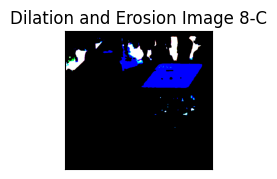

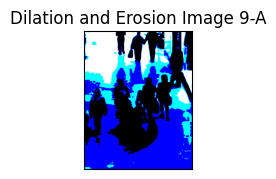

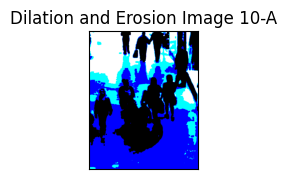

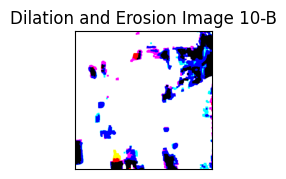

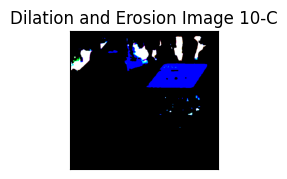

In [ ]:
plotting(dilated_eroded_images, titles_dilated_eroded, len(images) * 3, 3, 64)

**MODEL**

In [ ]:
import os
import random
import time
import concurrent.futures
from tqdm import tqdm
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import PIL
from tensorflow.keras.applications import resnet50, efficientnet, mobilenet
from PIL.ImageDraw import Draw
import torch.nn as nn
from torchvision import transforms
from keras.layers import *
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from time import process_time

In [ ]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams.update({'font.size': 14})

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.4f}'.format

In [ ]:
META_FILE = '/content/labels.csv'
data = pd.read_csv(META_FILE)
data.head()

id  count
0   1     35
1   2     41
2   3     41
3   4     44
4   5     41

In [ ]:
def reconstruct_path(image_id):
    """Превращает номерной ID изображения в относительный путь.
    """
    image_id = str(image_id).rjust(6, '0')
    return f'/content/frames/frames/seq_{image_id}.jpg'


data['path'] = data['id'].apply(reconstruct_path)
data.head()

id  count                                   path
0   1     35  /content/frames/frames/seq_000001.jpg
1   2     41  /content/frames/frames/seq_000002.jpg
2   3     41  /content/frames/frames/seq_000003.jpg
3   4     44  /content/frames/frames/seq_000004.jpg
4   5     41  /content/frames/frames/seq_000005.jpg

In [ ]:
data.describe()

id     count
count 2000.0000 2000.0000
mean  1000.5000   31.1575
std    577.4946    6.9454
min      1.0000   13.0000
25%    500.7500   26.0000
50%   1000.5000   31.0000
75%   1500.2500   36.0000
max   2000.0000   53.0000

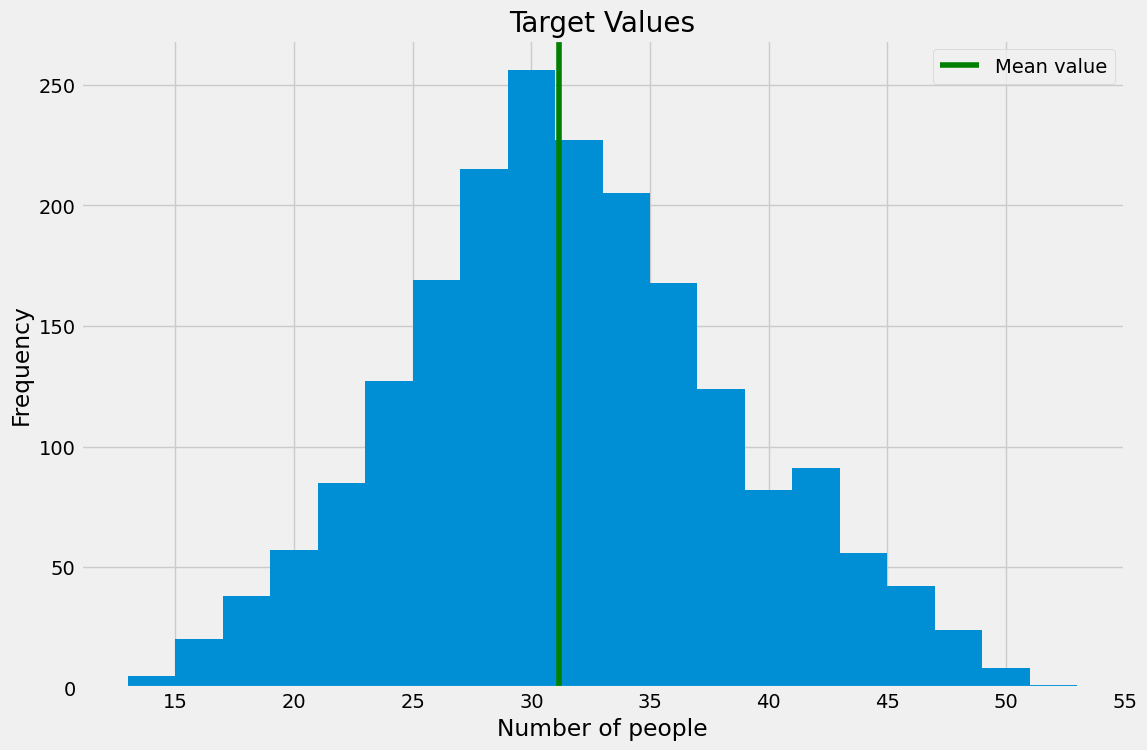

In [ ]:
plt.hist(data['count'], bins=20)
plt.axvline(data.describe().loc['mean', 'count'], label='Mean value', color='green')
plt.legend()
plt.xlabel('Number of people')
plt.ylabel('Frequency')
plt.title('Target Values')
plt.show()

**EFFICIENT NET**

In [ ]:
MODEL_PATH = 'https://tfhub.dev/tensorflow/efficientdet/d0/1'
detector = hub.load(MODEL_PATH)

In [ ]:
def detect_objects(path, model):
    """Извлекает изображение из файла, добавляет новую ось и применяет модель на объект.
    """
    image_tensor = tf.image.decode_jpeg(
        tf.io.read_file(path), channels=3)[tf.newaxis, ...]
    return model(image_tensor)


def count_persons(path, model, threshold=0.):
    """Считает количество людей на изображении.
    """
    results = detect_objects(path, model)
    # Класс 1 - и есть "человек".
    return (results['detection_classes'].numpy()[0] == 1)[np.where(
        results['detection_scores'].numpy()[0] > threshold)].sum()


def draw_boxes(image_path, data, threshold=0.):
    """Возвращает изображения с прямоугольниками поверх каждого обнаруженного человека.
    """
    image = PIL.Image.open(image_path)
    draw = Draw(image)

    im_width, im_height = image.size

    boxes = data['detection_boxes'].numpy()[0]
    classes = data['detection_classes'].numpy()[0]
    scores = data['detection_scores'].numpy()[0]

    for i in range(int(data['num_detections'][0])):
        if classes[i] == 1 and scores[i] > threshold:
            ymin, xmin, ymax, xmax = boxes[i]
            (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                          ymin * im_height, ymax * im_height)
            draw.line([(left, top), (left, bottom), (right, bottom), (right, top), (left, top)],
                      width=4, fill='red')

    return image

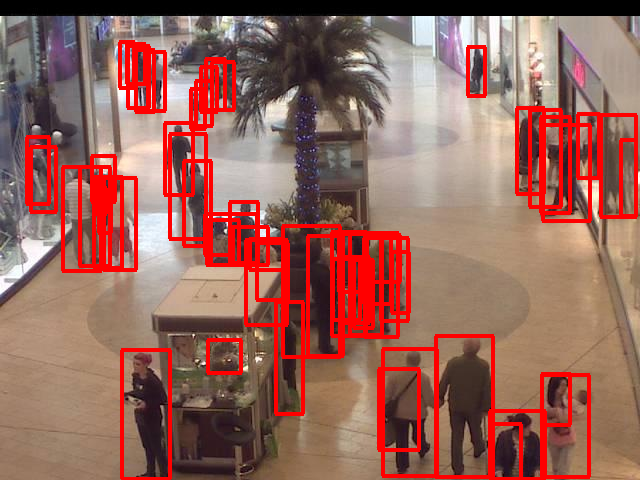

In [ ]:
example_path = '/content/frames/frames/seq_000001.jpg'
results = detect_objects(example_path, detector)
draw_boxes(example_path, results)

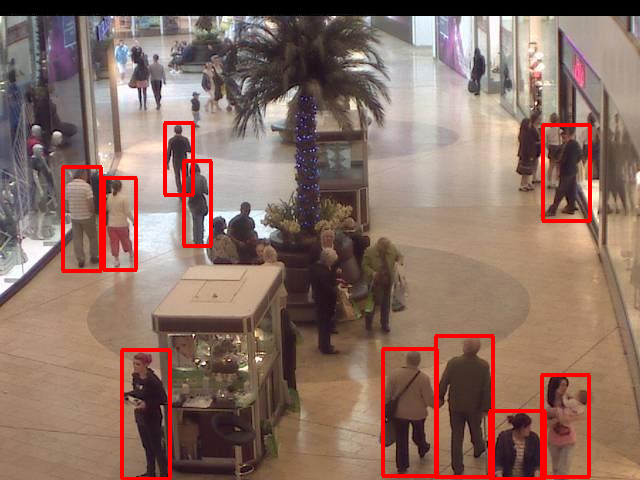

In [ ]:
draw_boxes(example_path, results, threshold=0.5)

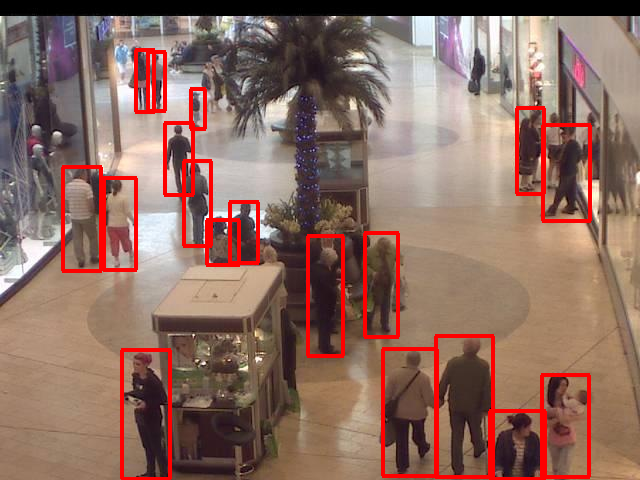

In [ ]:
draw_boxes(example_path, results, threshold=0.25)

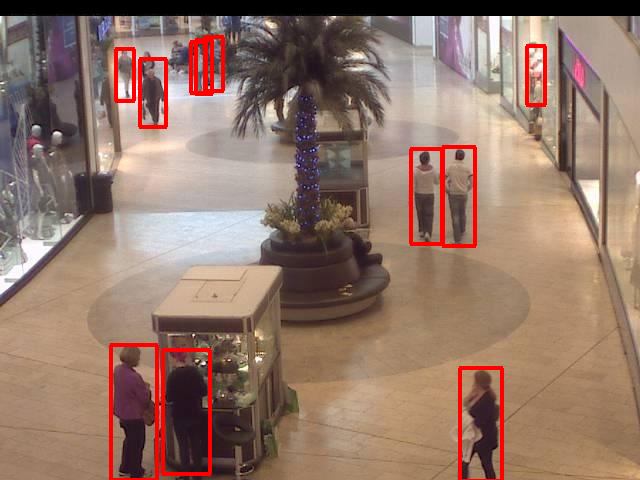

In [ ]:
example_path = data.loc[data['count'] == data['count'].min(), 'path'].iloc[0]
results = detect_objects(example_path, detector)
draw_boxes(example_path, results, threshold=0.25)

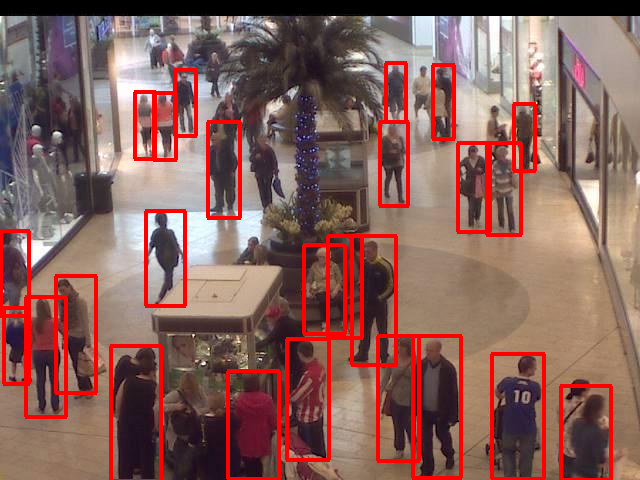

In [ ]:
example_path = data.loc[data['count'] == data['count'].max(), 'path'].iloc[0]
results = detect_objects(example_path, detector)
draw_boxes(example_path, results, threshold=0.25)

In [ ]:
sample = data.sample(frac=0.1)
start = time.process_time()
objects = []

with concurrent.futures.ThreadPoolExecutor() as executor:
    results = [executor.submit(count_persons, path, detector, 0.25) for path in sample['path']]
    for f in tqdm(concurrent.futures.as_completed(results)):
        objects.append(f.result())
end = time.process_time()
ed_time = round(end - start, 2)
print(f'Время выполнения: {ed_time}')

200it [00:49,  4.08it/s]

Время выполнения: 85.97


In [ ]:
sample['prediction'] = objects
sample.head(10)

id  count                                   path  prediction
1707  1708     33  /content/frames/frames/seq_001708.jpg          22
429    430     31  /content/frames/frames/seq_000430.jpg          14
1287  1288     26  /content/frames/frames/seq_001288.jpg          18
1902  1903     30  /content/frames/frames/seq_001903.jpg          17
905    906     42  /content/frames/frames/seq_000906.jpg          25
624    625     25  /content/frames/frames/seq_000625.jpg          24
1988  1989     26  /content/frames/frames/seq_001989.jpg          19
1049  1050     26  /content/frames/frames/seq_001050.jpg          17
366    367     41  /content/frames/frames/seq_000367.jpg          21
957    958     33  /content/frames/frames/seq_000958.jpg          23

MAE = 12.485
MSE = 203.045


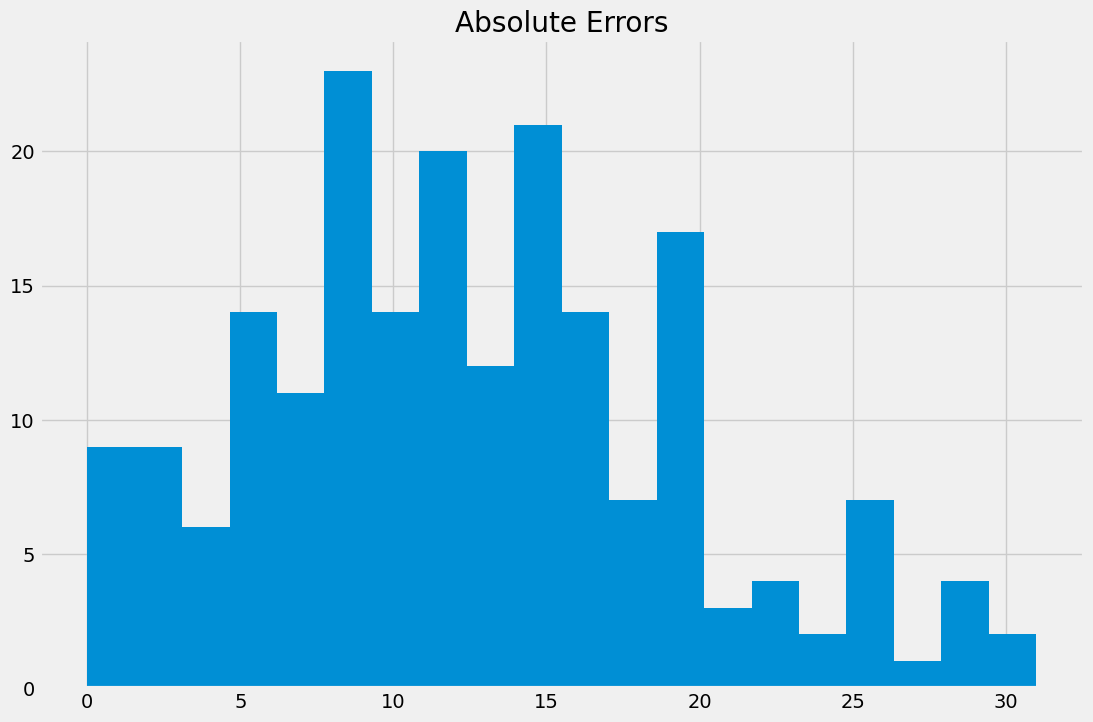

In [ ]:
sample['mae'] = (sample['count'] - sample['prediction']).abs()
sample['mse'] = sample['mae'] ** 2

mae_ed = sample['mae'].mean()
mse_ed = sample['mse'].mean()
print(f'MAE = {sample["mae"].mean()}\nMSE = {sample["mse"].mean()}')
plt.hist(sample['mae'], bins=20)
plt.title('Absolute Errors')
plt.show()

**InceptionResNetV2**

In [ ]:
def load_image(is_labelled, is_training=True):
    """Загружает либо просто изображение, если ему не соответствует значение, либо изображение вместе со значением.
    """
    def _get_image(path):
        """Загружает изображение из файла и меняет его случайным образом.
        """
        image = tf.image.decode_jpeg(tf.io.read_file(path), channels=3)
        image = tf.cast(image, dtype=tf.int32)
        image = tf.image.resize_with_pad(image, 299, 299)
        if is_training:
            image = tf.image.random_flip_left_right(image)
            image = tf.image.random_brightness(image, 0.1)
            image = tf.image.random_contrast(image, 0.1, 0.2)
            image = tf.image.random_saturation(image, 0.9, 1.1)
            image = tf.image.random_hue(image, 0.1)
        return tf.keras.applications.inception_resnet_v2.preprocess_input(image)

    def _get_image_label(img, label):
        """Загружает изображение вместе с соответствующим ему значением.
        """
        return _get_image(img), label

    return _get_image_label if is_labelled else _get_image


def prepare_dataset(dataset, is_training=True, is_labeled=True):
    """Меняет датасет так, чтобы он содержал тензоры изображений и соответствующие им значения.
    """
    image_read_fn = load_image(is_labeled, is_training)
    dataset = dataset.map(image_read_fn, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    return dataset.batch(16).prefetch(tf.data.experimental.AUTOTUNE)


def create_model():
    """Инициализирует модель, меняет её верхние слои, задаёт необходимые параметры.
    """
    feature_model = tf.keras.applications.InceptionResNetV2(
        include_top=False, pooling='avg')
    feature_model.trainable = False

    model = tf.keras.Sequential([
        tf.keras.Input((299, 299, 3)),
        feature_model,
        Dense(512, activation='selu'),
        Dense(1)
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss=tf.keras.losses.MeanSquaredError(),
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])

    return model


def plot_history(hist):
    """Создаёт график с оценкой обучения и ошибок.
    """
    mae = hist.history['mean_absolute_error']
    val_mae = hist.history['val_mean_absolute_error']
    x_axis = range(1, len(mae) + 1)
    plt.plot(x_axis, mae, 'bo', label='Training')
    plt.plot(x_axis, val_mae, 'ro', label='Validation')
    plt.title('MAE')
    plt.legend()
    plt.xlabel('Epochs')
    plt.tight_layout()
    plt.show()

In [ ]:
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

In [ ]:
data_train = data.head(1700) #для обучения
data_valid = data.tail(300) #для проверки

ds_train = tf.data.Dataset.from_tensor_slices((data_train['path'], data_train['count']))
ds_valid = tf.data.Dataset.from_tensor_slices((data_valid['path'], data_valid['count']))

ds_train = prepare_dataset(ds_train)
ds_valid = prepare_dataset(ds_valid, is_training=False)

In [ ]:
model = create_model()

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10,
    restore_best_weights=True)

lr_reduction = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', patience=1, cooldown=1, verbose=1,
    factor=0.75, min_lr=1e-8)

start = time.process_time()
history = model.fit(ds_train, validation_data=ds_valid,
                    epochs=50, callbacks=[early_stop, lr_reduction],
                    use_multiprocessing=True, workers=os.cpu_count())
end = time.process_time()
irn_time = round(end - start, 2)

Epoch 1/50
107/107 [==============================] - 58s 314ms/step - loss: 65.0423 - mean_absolute_error: 6.3605 - val_loss: 46.9773 - val_mean_absolute_error: 6.0177 - lr: 0.0010
Epoch 2/50
107/107 [==============================] - ETA: 0s - loss: 45.5879 - mean_absolute_error: 5.4519
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.0007500000356230885.
107/107 [==============================] - 24s 226ms/step - loss: 45.5879 - mean_absolute_error: 5.4519 - val_loss: 48.5970 - val_mean_absolute_error: 6.1605 - lr: 0.0010
Epoch 3/50
107/107 [==============================] - 23s 211ms/step - loss: 42.0939 - mean_absolute_error: 5.0578 - val_loss: 30.3201 - val_mean_absolute_error: 4.8143 - lr: 7.5000e-04
Epoch 4/50
107/107 [==============================] - ETA: 0s - loss: 35.9358 - mean_absolute_error: 4.6731
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005625000048894435.
107/107 [==============================] - 22s 204ms/step - loss: 35.9358 - mean_absolute_err

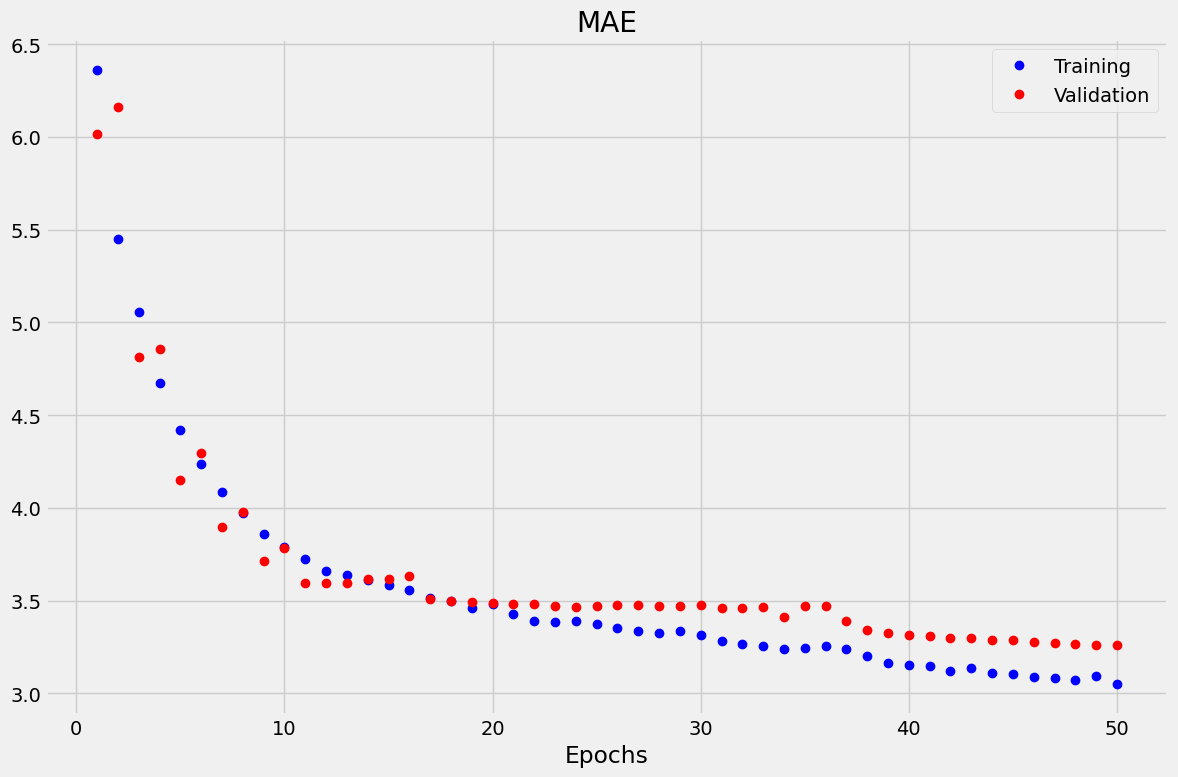

In [ ]:
plot_history(history)

In [ ]:
mse_irn, mae_irn = model.evaluate(ds_valid)
print(f'Validation MSE = {mse_irn}\n'
      f'Validation MAE = {mae_irn}')

19/19 [==============================] - 3s 169ms/step - loss: 17.2732 - mean_absolute_error: 3.2577
Validation MSE = 17.2731990814209
Validation MAE = 3.2576611042022705


**RESNET**

In [ ]:
resnet = resnet50.ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3),
    pooling='avg',
)

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
x = resnet.output
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='linear')(x)
rn_model = tf.keras.Model(inputs=resnet.input, outputs=predictions)

In [ ]:
rn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="mean_squared_error",
    metrics=['mean_absolute_error', 'mean_squared_error']
)

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    preprocessing_function=resnet50.preprocess_input,
)

In [ ]:
flow_params = dict(
    dataframe=data,
    x_col='path',
    y_col='count',
    weight_col=None,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='raw',
    batch_size=4,
    shuffle=True,
    seed=0,
)

train_generator = datagen.flow_from_dataframe(
    subset='training',
    **flow_params
)
valid_generator = datagen.flow_from_dataframe(
    subset='validation',
    **flow_params
)

Found 1600 validated image filenames.
Found 400 validated image filenames.


In [ ]:
for layer in rn_model.layers[:-7]:
    layer.trainable = False
for layer in rn_model.layers[-7:]:
    layer.trainable = True

In [ ]:
start = time.process_time()
history = rn_model.fit(train_generator, epochs=30, validation_data=valid_generator, verbose=2, )
end = time.process_time()
rn_time = round(end - start, 2)

Epoch 1/30
400/400 - 41s - loss: 15.5295 - mean_absolute_error: 3.1191 - mean_squared_error: 15.5295 - val_loss: 932.9026 - val_mean_absolute_error: 29.7643 - val_mean_squared_error: 932.9026 - 41s/epoch - 103ms/step
Epoch 2/30
400/400 - 31s - loss: 11.3986 - mean_absolute_error: 2.6287 - mean_squared_error: 11.3986 - val_loss: 79.1265 - val_mean_absolute_error: 8.4715 - val_mean_squared_error: 79.1265 - 31s/epoch - 78ms/step
Epoch 3/30
400/400 - 33s - loss: 6.6434 - mean_absolute_error: 2.0262 - mean_squared_error: 6.6434 - val_loss: 10.5061 - val_mean_absolute_error: 2.5560 - val_mean_squared_error: 10.5061 - 33s/epoch - 81ms/step
Epoch 4/30
400/400 - 32s - loss: 6.3775 - mean_absolute_error: 1.9977 - mean_squared_error: 6.3775 - val_loss: 108.0190 - val_mean_absolute_error: 9.9706 - val_mean_squared_error: 108.0190 - 32s/epoch - 80ms/step
Epoch 5/30
400/400 - 33s - loss: 5.1749 - mean_absolute_error: 1.7988 - mean_squared_error: 5.1749 - val_loss: 63.0739 - val_mean_absolute_error: 

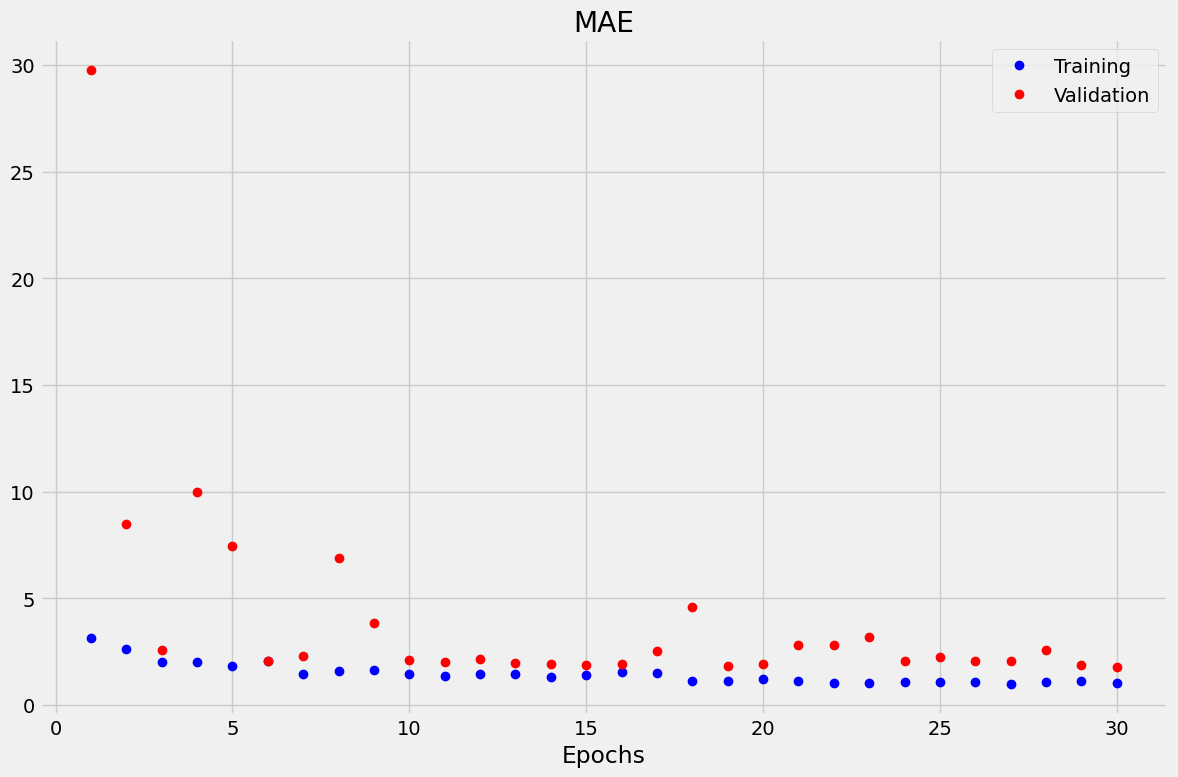

In [ ]:
plot_history(history)

In [ ]:
mae_rn = history.history['mean_absolute_error'][29]
mse_rn = history.history['mean_squared_error'][29]
print(f'Validation MSE = {mse_rn}\n'
      f'Validation MAE = {mae_rn}')

Validation MSE = 1.6202181577682495
Validation MAE = 1.0029789209365845


**EfficientNet B0**

In [ ]:
en = efficientnet.EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3),
    pooling='avg',
)

16705208/16705208 [==============================] - 2s 0us/step


In [ ]:
x = en.output
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='linear')(x)
en_model = tf.keras.Model(inputs=en.input, outputs=predictions)

In [ ]:
en_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="mean_squared_error",
    metrics=['mean_absolute_error', 'mean_squared_error']
)

In [ ]:
for layer in en_model.layers[:-10]:
    layer.trainable = False
for layer in en_model.layers[-10:]:
    layer.trainable = True

In [ ]:
start = time.process_time()
history = en_model.fit(train_generator, epochs=30, validation_data=valid_generator, verbose=2, )
end = time.process_time()
en_time = round(end - start, 2)

Epoch 1/30
400/400 - 81s - loss: 43.1869 - mean_absolute_error: 4.7875 - mean_squared_error: 43.1869 - val_loss: 1851.9999 - val_mean_absolute_error: 42.5051 - val_mean_squared_error: 1851.9999 - 81s/epoch - 203ms/step
Epoch 2/30
400/400 - 33s - loss: 14.4416 - mean_absolute_error: 3.0079 - mean_squared_error: 14.4416 - val_loss: 1865.9147 - val_mean_absolute_error: 42.6796 - val_mean_squared_error: 1865.9147 - 33s/epoch - 81ms/step
Epoch 3/30
400/400 - 35s - loss: 8.5800 - mean_absolute_error: 2.3004 - mean_squared_error: 8.5800 - val_loss: 1558.2915 - val_mean_absolute_error: 38.8910 - val_mean_squared_error: 1558.2915 - 35s/epoch - 87ms/step
Epoch 4/30
400/400 - 34s - loss: 7.4184 - mean_absolute_error: 2.1459 - mean_squared_error: 7.4184 - val_loss: 1886.7091 - val_mean_absolute_error: 42.9142 - val_mean_squared_error: 1886.7091 - 34s/epoch - 84ms/step
Epoch 5/30
400/400 - 31s - loss: 6.4643 - mean_absolute_error: 1.9946 - mean_squared_error: 6.4643 - val_loss: 1488.8690 - val_mean

In [ ]:
mae_en = history.history['mean_absolute_error'][29]
mse_en = history.history['mean_squared_error'][29]
print(f'Validation MSE = {mse_en}\n'
      f'Validation MAE = {mae_en}')

Validation MSE = 1.6521942615509033
Validation MAE = 1.0369305610656738


**MobileNet**

In [ ]:
mn = mobilenet.MobileNet(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3),
    pooling='avg',
)

17225924/17225924 [==============================] - 2s 0us/step


In [ ]:
x = mn.output
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='linear')(x)
mn_model = tf.keras.Model(inputs=mn.input, outputs=predictions)

In [ ]:
mn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="mean_squared_error",
    metrics=['mean_absolute_error', 'mean_squared_error']
)

In [ ]:
for layer in en_model.layers[:-7]:
    layer.trainable = False
for layer in en_model.layers[-7:]:
    layer.trainable = True

In [ ]:
start = time.process_time()
history = mn_model.fit(train_generator, epochs=20, validation_data=valid_generator, verbose=2, )
end = time.process_time()
mn_time = round(end - start, 2)

Epoch 1/20
400/400 - 29s - loss: 30.4272 - mean_absolute_error: 4.1448 - mean_squared_error: 30.4272 - val_loss: 76.8391 - val_mean_absolute_error: 8.1428 - val_mean_squared_error: 76.8391 - 29s/epoch - 73ms/step
Epoch 2/20
400/400 - 13s - loss: 11.5891 - mean_absolute_error: 2.6703 - mean_squared_error: 11.5891 - val_loss: 69.9828 - val_mean_absolute_error: 7.6586 - val_mean_squared_error: 69.9828 - 13s/epoch - 32ms/step
Epoch 3/20
400/400 - 17s - loss: 9.0144 - mean_absolute_error: 2.3421 - mean_squared_error: 9.0144 - val_loss: 6.0045 - val_mean_absolute_error: 1.9116 - val_mean_squared_error: 6.0045 - 17s/epoch - 44ms/step
Epoch 4/20
400/400 - 13s - loss: 5.0645 - mean_absolute_error: 1.7653 - mean_squared_error: 5.0645 - val_loss: 5.7580 - val_mean_absolute_error: 1.9339 - val_mean_squared_error: 5.7580 - 13s/epoch - 32ms/step
Epoch 5/20
400/400 - 14s - loss: 5.5423 - mean_absolute_error: 1.8756 - mean_squared_error: 5.5423 - val_loss: 18.6231 - val_mean_absolute_error: 3.6701 - v

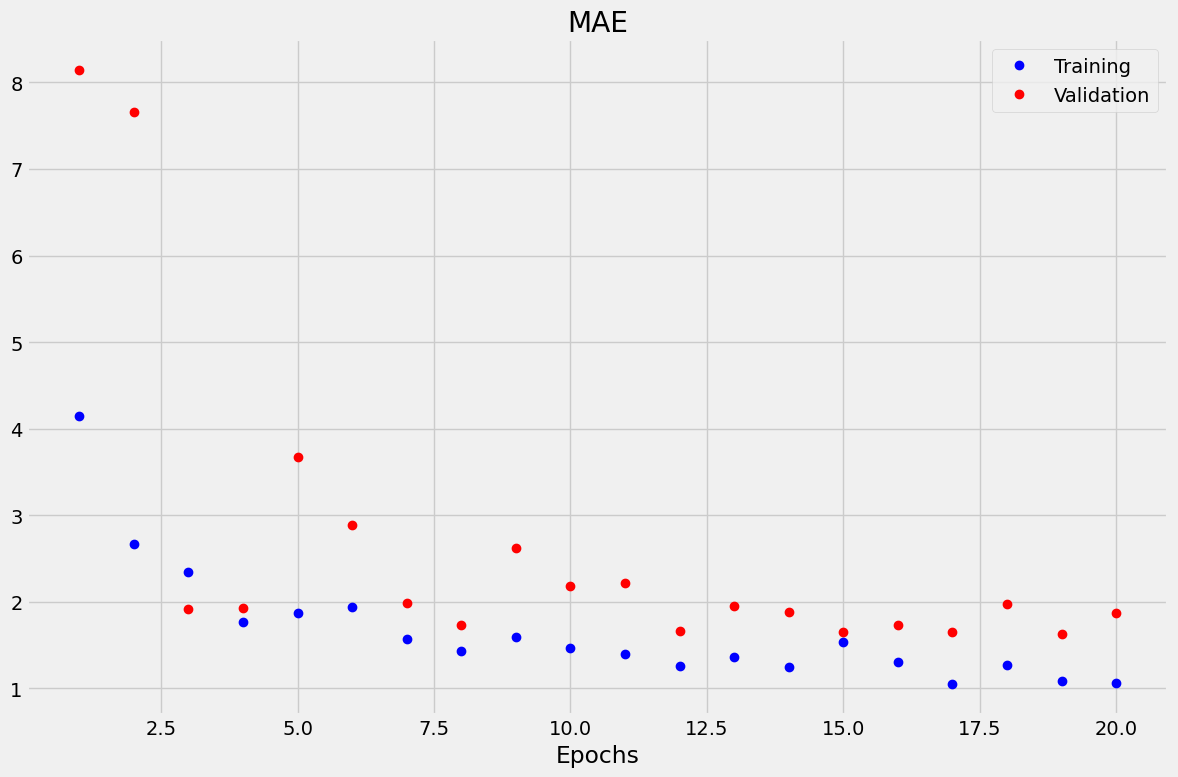

In [ ]:
plot_history(history)

In [ ]:
mae_mn = history.history['mean_absolute_error'][19]
mse_mn = history.history['mean_squared_error'][19]
print(f'Validation MSE = {mse_mn}\n'
      f'Validation MAE = {mae_mn}')

Validation MSE = 1.8131980895996094
Validation MAE = 1.05734384059906


In [ ]:
from prettytable import PrettyTable

table = PrettyTable(['Моdel', 'Training time', 'MAE', 'MSE'])

# table.add_row(['EfficientDet', '-', mae_ed, mse_ed])
table.add_row(['InceptionResNetV2', irn_time, mae_irn, mse_irn])
table.add_row(['ResNet50', rn_time, mae_rn, mse_rn])
table.add_row(['EfficientNet B0', en_time, mae_en, mse_en])
table.add_row(['MobileNet', mn_time, mae_mn, mse_mn])

print(table)

+-------------------+---------------+--------------------+--------------------+
|       Моdel       | Training time |        MAE         |        MSE         |
+-------------------+---------------+--------------------+--------------------+
| InceptionResNetV2 |    1059.09    | 3.2576611042022705 |  17.2731990814209  |
|      ResNet50     |     1123.2    | 1.0029789209365845 | 1.6202181577682495 |
|  EfficientNet B0  |    1204.23    | 1.0369305610656738 | 1.6521942615509033 |
|     MobileNet     |     412.12    |  1.05734384059906  | 1.8131980895996094 |
+-------------------+---------------+--------------------+--------------------+


In [ ]:
import tensorflow as tf
import time
import os
from tensorflow import keras
from keras.models import Sequential


In [ ]:


# Define MCNN (Multi-column Convolutional Neural Network) model
def create_mccn_model():
    inputs = tf.keras.layers.Input(shape=(None, None, 3))
    conv1 = tf.keras.layers.Conv2D(24, (5, 5), activation='relu', padding='same')(inputs)
    maxpool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = tf.keras.layers.Conv2D(48, (3, 3), activation='relu', padding='same')(maxpool1)
    maxpool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = tf.keras.layers.Conv2D(24, (3, 3), activation='relu', padding='same')(maxpool2)
    conv4 = tf.keras.layers.Conv2D(12, (3, 3), activation='relu', padding='same')(conv3)
    conv5 = tf.keras.layers.Conv2D(1, (1, 1), activation='relu', padding='same')(conv4)
    model = tf.keras.Model(inputs=inputs, outputs=conv5)
    return model

# Define CANNet (Context-Aware Crowd Counting) model
def create_cannet_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(None, None, 3)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2DTranspose(128, (4, 4), strides=(8, 8), padding='same', activation='relu'),
        tf.keras.layers.Conv2D(1, (1, 1), activation='linear', padding='same')
    ])
    return model

# Define the combined model
def create_combined_model():
    # Create MCNN model
    mcnn_model = create_mccn_model()
    mcnn_model.trainable = False
    mcnn_output = mcnn_model.output

    # Create CANNet model
    cannnet_model = create_cannet_model()
    cannnet_model.trainable = False
    cannnet_output = cannnet_model(mcnn_output)

    # Combine the models
    combined_model = tf.keras.Model(inputs=mcnn_model.input, outputs=cannnet_output)

    return combined_model

# Create the combined model
model = create_combined_model()

# Load the training and validation datasets (replace ds_train and ds_valid with your datasets)
# Define callbacks
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10,
    restore_best_weights=True)

lr_reduction = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', patience=1, cooldown=1, verbose=1,
    factor=0.75, min_lr=1e-8)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Start training
start = time.process_time()
history = model.fit(ds_train, validation_data=ds_valid,
                    epochs=50, callbacks=[early_stop, lr_reduction],
                    use_multiprocessing=True, workers=os.cpu_count())
end = time.process_time()
execution_time = round(end - start, 2)

print(f'Execution time: {execution_time} seconds')


NameError: name 'tf' is not defined